In [1]:
import matplotlib as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import pickle
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
dataset = pd.read_csv(r"Datasets\Crop_recommendation_simulated.csv")




X=dataset.drop(columns=['label'])
Y=dataset['label']
print(X.head())

print(dataset['label'].unique())
#X = pd.get_dummies(X, drop_first=True)  #one hot encoding


    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  78  42  42    20.130175  81.604873  7.628473  262.717340
4  69  37  42    23.058049  83.370118  7.073454  251.055000
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [18]:

#transform numerical data into a range from 0 to 1

scaler = StandardScaler()
X = scaler.fit_transform(X)


le = LabelEncoder()
Y = le.fit_transform(Y)

with open(r"Trained_models\scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [19]:
#train test split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=42,test_size=0.3)


In [20]:

model = Sequential([
   Dense(64, activation='relu', input_dim=7),

    Dense(32, activation='relu'),       #hidden layer 1
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),       #hidden layer 2
    BatchNormalization(),
    Dropout(0.3),

    Dense(22, activation='softmax')  # Output layer for 22 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy
              metrics=['accuracy'])


model.summary()


y_train = to_categorical(ytrain, num_classes=22)
y_test = to_categorical(ytest, num_classes=22)


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,630 (18.09 KB)

 Trainable params: 4,502 (17.59 KB)

 Non-trainable params: 128 (512.00 B)

In [21]:
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=100, batch_size=32)

# Save the entire model to a file
model.save(r"Trained_models\my_model.h5")


Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3296 - loss: 2.3351 - val_accuracy: 0.9301 - val_loss: 0.6225
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8081 - loss: 0.7121 - val_accuracy: 0.9669 - val_loss: 0.1434
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8908 - loss: 0.3958 - val_accuracy: 0.9737 - val_loss: 0.0922
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9141 - loss: 0.2755 - val_accuracy: 0.9848 - val_loss: 0.0567
Epoch 5/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9360 - loss: 0.2209 - val_accuracy: 0.9814 - val_loss: 0.0510
Epoch 6/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9466 - loss: 0.1656 - val_accuracy: 0.9860 - val_loss: 0.0392
Epoch 7/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9542 - loss: 0.1489 - val_accuracy: 0.9794 - val_loss: 0.0485
Epoch 8/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9568 - loss: 0.1306 - val_accu

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
Model Accuracy: 99.28%


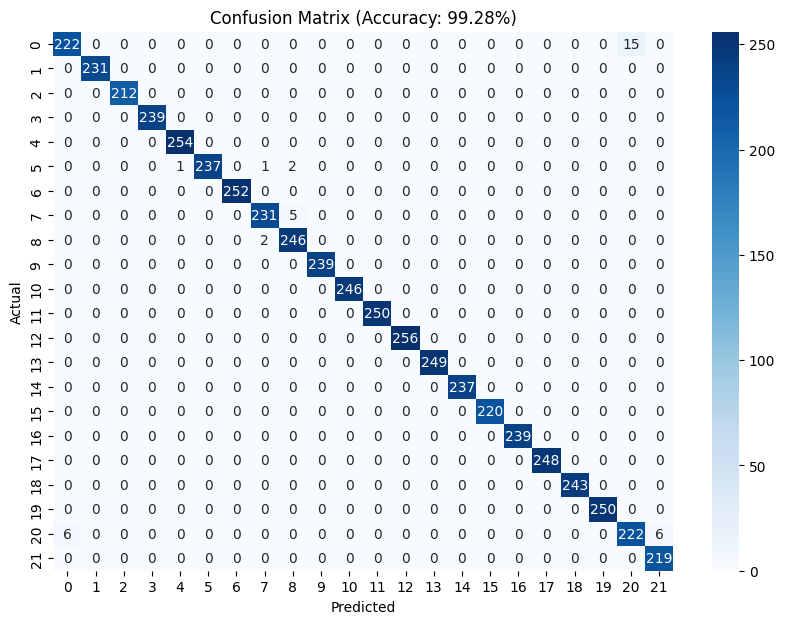

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(xtest), axis=1)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Generate confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2%})")
plt.show()